# Pymaceuticals Inc.
---

This data analysis scrutinizes the effectiveness of various treatments for squamous cell carcinoma over a 45-day period, utilizing gathered information to discern their potential impact.
### Analysis
 -The analysis reveals that Ramicane exhibited the most promising performance, closely trailed by Capomulin. Comparing the efficacy of both drugs with the placebo treatment data, a discernible reduction in tumor sizes is evident across all summary statistics 
The drug regimen with the least favorable performance was Ketapril, evidenced by its higher standard deviation of 8.27mm³ compared to the placebo's standard deviation of 7.82mm
 
 -Upon analyzing the data pertaining to Capomulin, a notable observation emerges: there appears to be a correlation between the weight of the mice and their tumor volume while under this treatment. Specifically, an increase in the mice's weight seems to correspond with a higher tumor volume. While several factors may contribute to this trend, such as variations in metabolism or dosage response, it also raises questions regarding the drug's efficacy relative to weight
 
  Further investigation is warranted into the response of mice treated with Capomulin. An examination of mice l509, g288, b128, and b742 reveals an initial downward trend in tumor volume over the course of the 45-day observation period. However, towards the end of the study, these mice exhibit a noticeable upward trend in tumor volume. To comprehensively evaluate the efficacy of the Capomulin, more information should be gathered. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how = "right", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [61]:
# Checking the number of mice.
total_mice = combined_data['Mouse ID'].nunique()
total_mice

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_id)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_data = combined_data[combined_data["Mouse ID"] != 'g989']
cleaned_data = combined_data[combined_data["Mouse ID"] != duplicate_mice.iloc[0].get('Mouse ID')]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [65]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = cleaned_data['Mouse ID'].nunique()
clean_total_mice

248

## Summary Statistics

In [66]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: using "tumor volume(mm3)" column
tumor_data = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

## Mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Calculate mean of tumor volume for each drug regimen
mean_tumor = tumor_data.mean()

# Calculate median of tumor volume for each drug regimen
median_tumor = tumor_data.median()

# Calculate variance of tumor volume for each drug regimen
variance_tumor = tumor_data.var()

# Calculate standard deviation of tumor volume for each drug regimen
std_dev_tumor = tumor_data.std()

# Assemble the resulting series into a single DataFrame
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Variance of Tumor Volume": variance_tumor,
    "Standard Deviation of Tumor Volume": std_dev_tumor
})

# Display the summary statistics
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#drug_summary = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_summary = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

drug_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

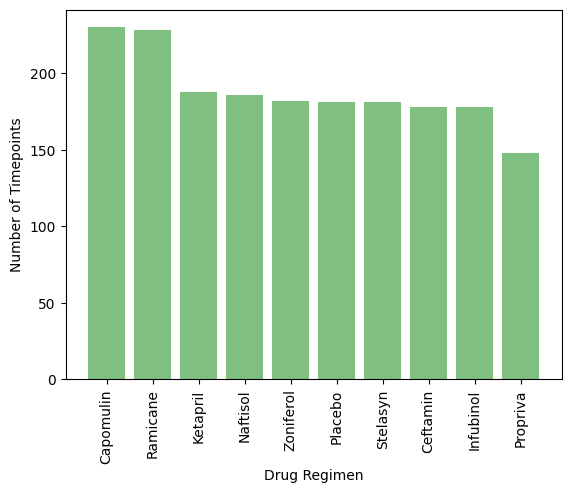

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_barchart = cleaned_data.groupby('Drug Regimen')['Timepoint'].count()
# sorts by descending value
mice_barchart = mice_barchart.sort_values(ascending = False)

x_axis = mice_barchart.index
y_axis = mice_barchart.values

plt.bar(x_axis, y_axis, color = 'g', alpha = 0.5, align = 'center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_barchart.index, rotation = 'vertical')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.show()

<Axes: xlabel='Drug Regimen', ylabel='Timepoint'>

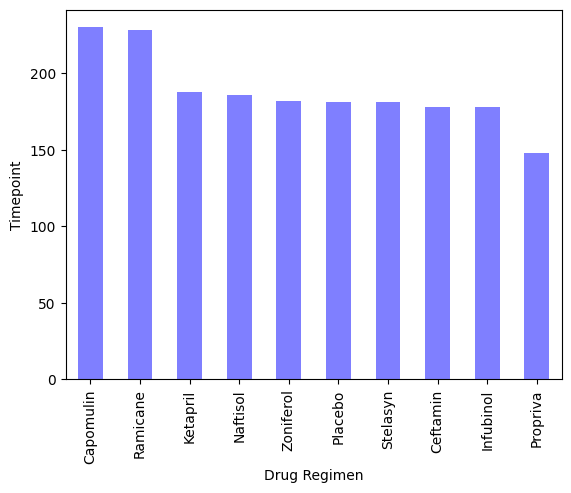

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')


mice_barchart.plot.bar(color = 'b', alpha = 0.5, align = 'center')

<Axes: ylabel='count'>

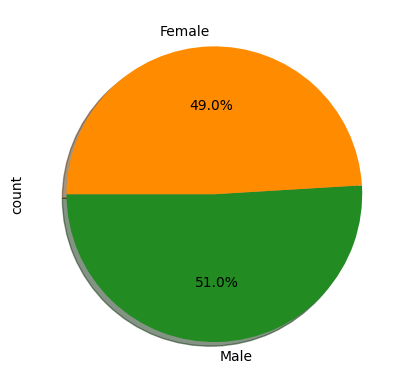

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_counts = cleaned_data['Sex'].value_counts()

# Plotting the pie chart directly from the DataFrame
mice_counts.plot(kind='pie', colors=['forestgreen', 'darkorange'], autopct='%1.1f%%', startangle=180, shadow=True)

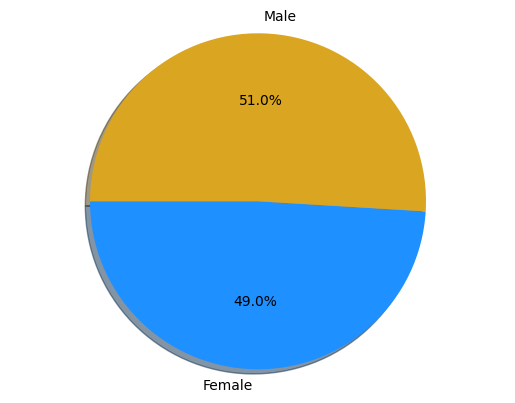

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# importing from cleaned_data
mice_male = cleaned_data[cleaned_data['Sex'] == 'Male']['Sex'].count()
mice_female = cleaned_data[cleaned_data['Sex'] == 'Female']['Sex'].count()

labels = ["Female", "Male"]
sizes = [mice_female, mice_male]
colors = ["dodgerblue", "goldenrod"]
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
# to make sure it's a circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint = mouse_timepoint.merge(cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Loop through each treatment regimen
for name in treatment_names:
    # Filter max_timepoint DataFrame for the current treatment regimen
    treatment = max_timepoint[max_timepoint['Drug Regimen'] == name]
    
    # Print the first few rows of the treatment DataFrame
    print(f"Treatment Regimen: {name}")
    print(treatment.head())


Treatment Regimen: Capomulin
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
19     b128         45    Capomulin  Female           9          22   
24     b742         45    Capomulin    Male           7          21   
61     f966         20    Capomulin    Male          16          17   
64     g288         45    Capomulin    Male           3          19   
66     g316         45    Capomulin  Female          22          22   

    Tumor Volume (mm3)  Metastatic Sites  
19           38.982878                 2  
24           38.939633                 0  
61           30.485985                 0  
64           37.074024                 1  
66           40.159220                 2  
Treatment Regimen: Ramicane
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
6      a411         45     Ramicane    Male           3          22   
7      a444         45     Ramicane  Female          10          25   
10     a520         45     Ramicane    Male  

In [73]:
# Put treatments into a list for for loop (and later for plot labels)
  ## list used from above 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment_name in treatment_names:
    treatment = max_timepoint[max_timepoint['Drug Regimen'] == treatment_name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_values = treatment['Tumor Volume (mm3)'].tolist()
    tumor_vol_data.append(tumor_vol_values)
    
    # add subset 
    subset = max_timepoint[max_timepoint['Drug Regimen'] == treatment_name]
    
    mice_quartile = subset['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = mice_quartile[0.25]
    upperq = mice_quartile[0.75]
    mice_iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*mice_iqr)
    upper_bound = upperq + (1.5*mice_iqr)
    outliers = treatment[(treatment['Tumor Volume (mm3)'] < lower_bound) | (treatment['Tumor Volume (mm3)'] > upper_bound)]

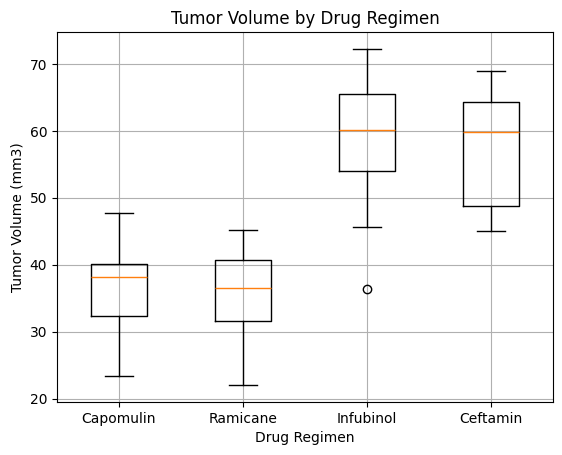

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_names)
plt.title('Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Line and Scatter Plots

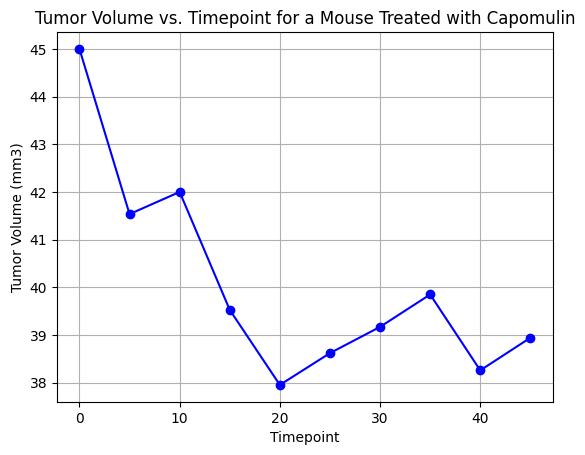

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# input capo_mouse id to plot the line graph
capo_mouse = 'b742'
mouse_graph = capo_data[capo_data['Mouse ID'] == capo_mouse]

timepoints = mouse_graph['Timepoint']
tumor_volumes = mouse_graph['Tumor Volume (mm3)']

plt.plot(timepoints, tumor_volumes, marker='o', color='blue', linestyle='-')
plt.title('Tumor Volume vs. Timepoint for a Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

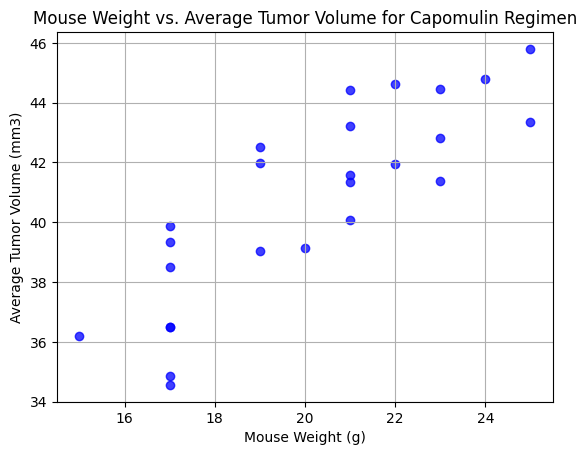

In [82]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin treatment

# Calculate average tumor volume for each mouse
average_tumor_volume = capo_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capo_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

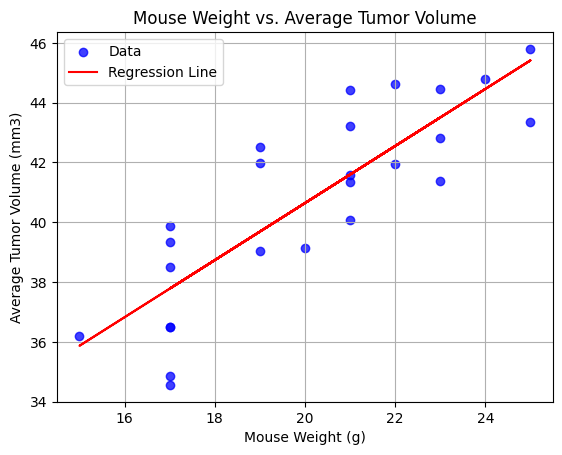

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the regression line

# Plot the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color='blue', alpha=0.75, label='Data')

# Fit linear regression model
ca_slope, ca_int, _, _, _ = st.linregress(mouse_weight, average_tumor_volume)

# Calculate regression line
regression_line = ca_slope * mouse_weight + ca_int

# Plot regression line
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()